In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import time
from Gradient_based_methods import *
from Heuristic_methods import *

In [11]:
def sphere(x, y):
    return x**2 + y**2

def saddle_test(x, y):
    return  x**2 - y**2

def rastrigin(x, y):
    return 20 + x**2 + y**2 - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
           np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def eggholder(x, y):
    return -(y + 47) * np.sin(np.sqrt(np.abs(x/2 + y + 47))) - \
           x * np.sin(np.sqrt(np.abs(x - (y + 47))))

Gradients and vectors

In [12]:
# --- SPHERE ---
def sphere_vec(x):
    return x[0]**2 + x[1]**2

def grad_sphere(x):
    return 2 * x

def hess_sphere(x):
    return np.array([[2, 0], [0, 2]])


# --- SADDLE ---
def saddle_vec(x):
    return x[0]**2 - x[1]**2

def grad_saddle(x):
    return np.array([2 * x[0], -2 * x[1]])

def hess_saddle(x):
    return np.array([[2, 0], [0, -2]])


# --- RASTRIGIN ---
def rastrigin_vec(x):
    return 20 + x[0]**2 + x[1]**2 - 10 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))

def grad_rastrigin(x):
    dx = 2 * x[0] + 20 * np.pi * np.sin(2 * np.pi * x[0])
    dy = 2 * x[1] + 20 * np.pi * np.sin(2 * np.pi * x[1])
    return np.array([dx, dy])


# --- HIMMELBLAU ---
def himmelblau_vec(x):
    x1, x2 = x[0], x[1]
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def grad_himmelblau(x):
    x1, x2 = x[0], x[1]
    dx = 4 * x1 * (x1**2 + x2 - 11) + 2 * (x1 + x2**2 - 7)
    dy = 2 * (x1**2 + x2 - 11) + 4 * x2 * (x1 + x2**2 - 7)
    return np.array([dx, dy])


# --- ACKLEY ---
def ackley_vec(x):
    x1, x2 = x[0], x[1]
    sum_sq = 0.5 * (x1**2 + x2**2)
    cos_sum = 0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))
    return -20 * np.exp(-0.2 * np.sqrt(sum_sq)) - np.exp(cos_sum) + 20 + np.e

def grad_ackley(x):
    x1, x2 = x[0], x[1]
    sq = 0.5 * (x1**2 + x2**2)
    sqrt_sq = np.sqrt(sq)
    exp1 = np.exp(-0.2 * sqrt_sq)
    exp2 = np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))

    dfdx = (4 * x1 * exp1 / (10 * sqrt_sq)) + (2 * np.pi * np.sin(2 * np.pi * x1) * exp2)
    dfdy = (4 * x2 * exp1 / (10 * sqrt_sq)) + (2 * np.pi * np.sin(2 * np.pi * x2) * exp2)
    return np.array([dfdx, dfdy])


# --- EGGHOLDER ---
def eggholder_vec(x):
    x1, x2 = x[0], x[1]
    return -(x2 + 47) * np.sin(np.sqrt(abs(x1 / 2 + x2 + 47))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

# : < 

In [13]:
def plot_3d_function(func, xlim, ylim, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    X = np.linspace(*xlim, 200)
    Y = np.linspace(*ylim, 200)
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)
    
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.tight_layout()
    plt.show()

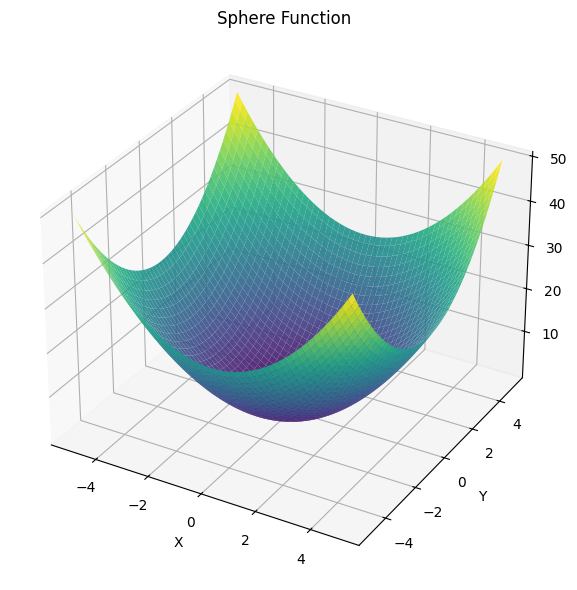

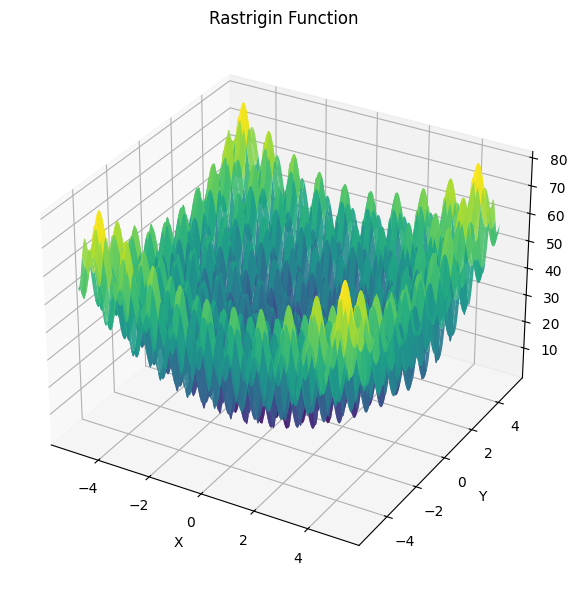

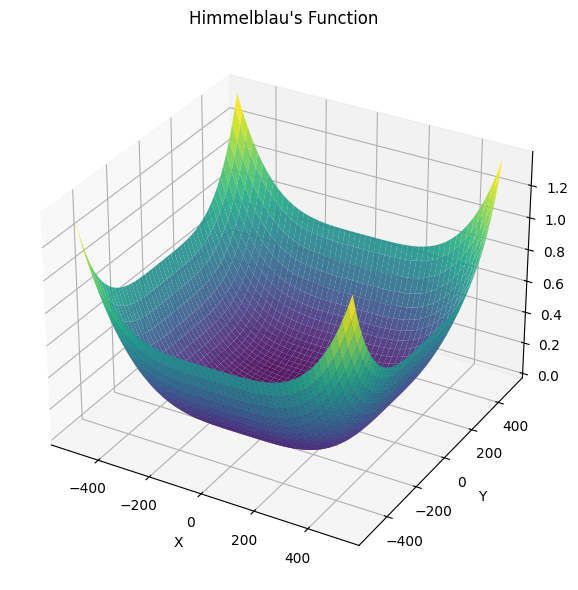

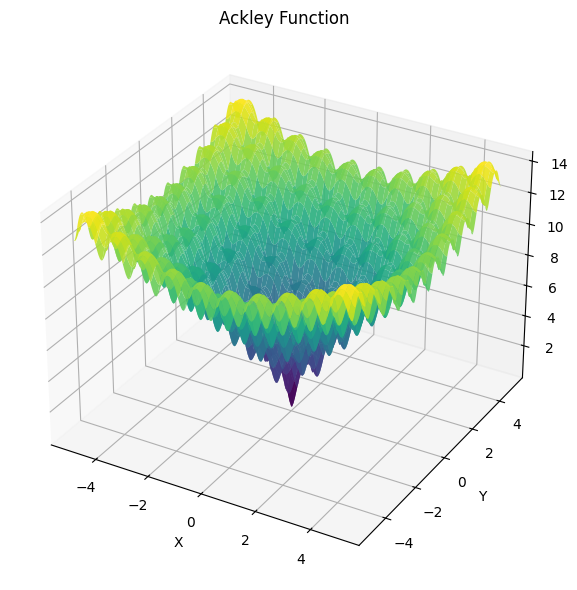

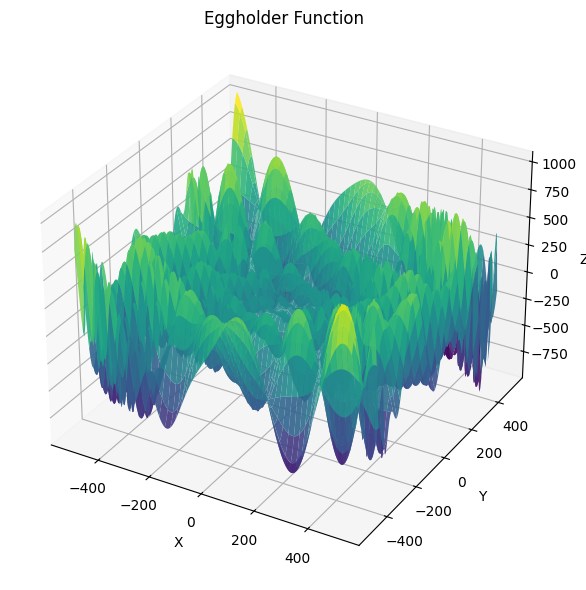

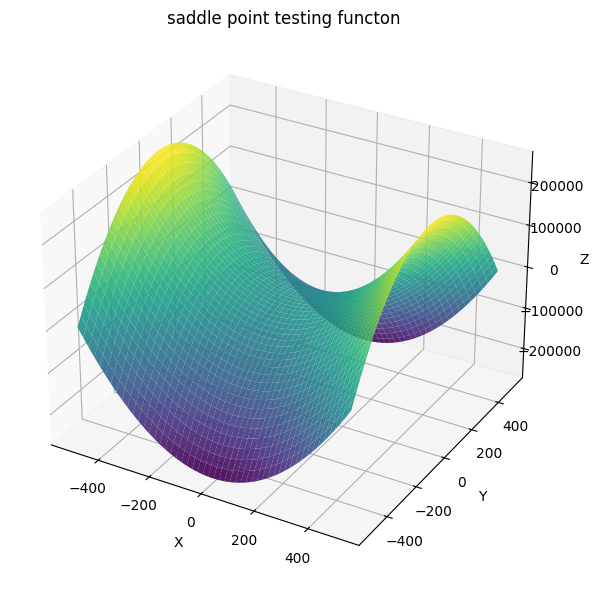

In [14]:
plot_3d_function(sphere, (-5, 5), (-5, 5), "Sphere Function")
plot_3d_function(rastrigin, (-5.12, 5.12), (-5.12, 5.12), "Rastrigin Function")
plot_3d_function(himmelblau, (-512, 512), (-512, 512), "Himmelblau's Function")
plot_3d_function(ackley, (-5, 5), (-5, 5), "Ackley Function")
plot_3d_function(eggholder, (-512, 512), (-512, 512), "Eggholder Function")
plot_3d_function(saddle_test, (-512, 512), (-512, 512), "saddle point testing functon" )

Example Usage 

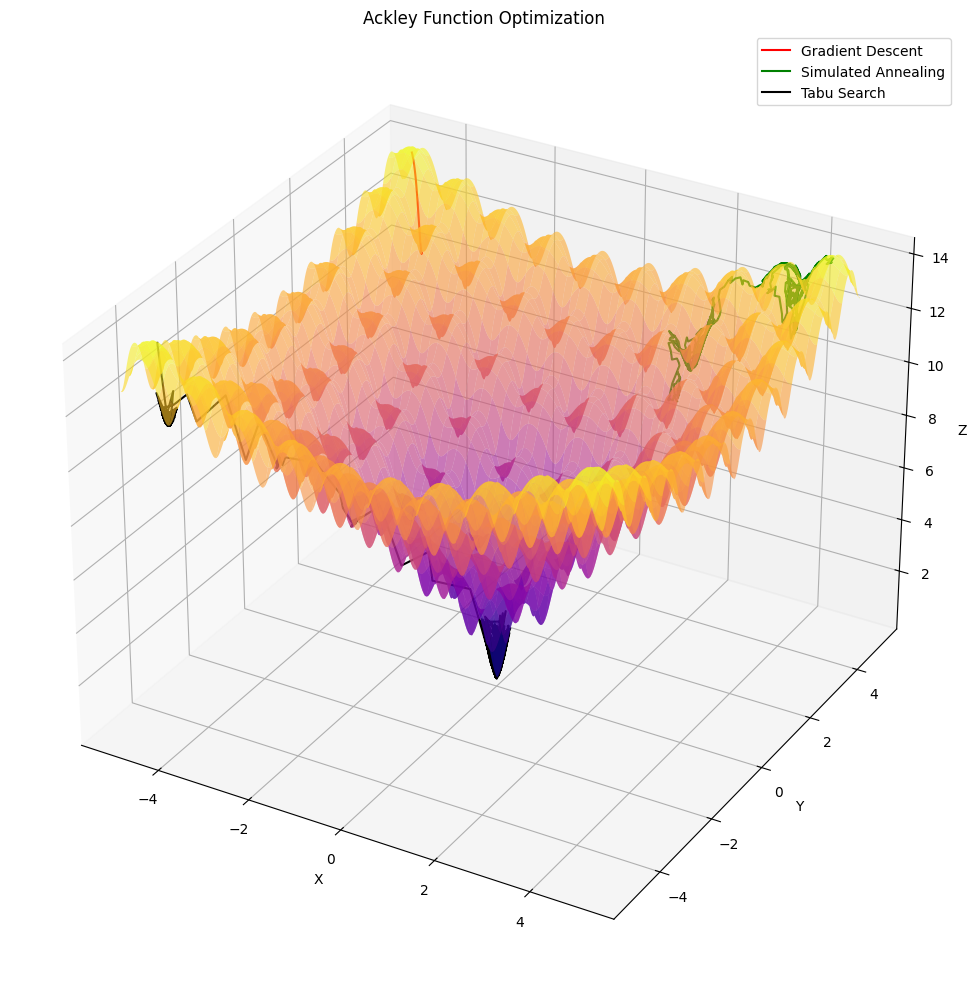

Ackley Optimization Results:
  Gradient Descent:
    • Found minimum: f(x*) = 11.010559
    • Error from f*   = 11.010559
    • Iterations      = 32
    • Elapsed time    = 0.000474 s

  Simulated Annealing:
    • Found minimum: f(x*) = 8.872073
    • Error from f*   = 8.872073
    • Iterations      = 501
    • Elapsed time    = 0.006984 s

  Tabu Search:
    • Found minimum: f(x*) = 0.011263
    • Error from f*   = 0.011263
    • Iterations      = 501
    • Elapsed time    = 4.410817 s


In [15]:
# --- Setup for Ackley ---
x0_ackley_gd        = np.array([-4.5,  4.5])
x0_ackley_sim_ann   = np.array([ 4.5,  4.5])
x0_ackley_tabu_search = np.array([-4.5, -4.5])

bounds_ackley = np.array([[-5, 5], [-5, 5]])
f_star_ackley = 0.0  # known global minimum

# ------------------ Gradient Descent ------------------
t0 = time.perf_counter()
opt_gd_a, path_gd_a = gradient_descent(
    grad_ackley,
    x0_ackley_gd,
    lr=0.01,
    max_iters=500
)
elapsed_gd = time.perf_counter() - t0
iters_gd   = len(path_gd_a)
min_gd     = ackley_vec(opt_gd_a)
error_gd   = abs(min_gd - f_star_ackley)

# ---------------- Simulated Annealing -----------------
t0 = time.perf_counter()
opt_sa_a, path_sa_a = simulated_annealing(
    ackley_vec,
    x0_ackley_sim_ann,
    bounds_ackley,
    max_iters=500,
    temp=50,
    cooling=0.99
)
elapsed_sa = time.perf_counter() - t0
iters_sa   = len(path_sa_a)
min_sa     = ackley_vec(opt_sa_a)
error_sa   = abs(min_sa - f_star_ackley)

# -------------------- Tabu Search ---------------------
t0 = time.perf_counter()
opt_tabu_a, path_tabu_a = tabu_search(
    ackley_vec,
    x0_ackley_tabu_search,
    bounds_ackley,
    max_iters=500,
    tabu_size=30,
    step=0.6
)
elapsed_tabu = time.perf_counter() - t0
iters_tabu   = len(path_tabu_a)
min_tabu     = ackley_vec(opt_tabu_a)
error_tabu   = abs(min_tabu - f_star_ackley)

# --- Prepare trajectories for plotting ---
path_gd_a   = np.array(path_gd_a)
path_sa_a   = np.array(path_sa_a)
path_tabu_a = np.array(path_tabu_a)

Z_gd_a   = [ackley(x[0], x[1]) for x in path_gd_a]
Z_sa_a   = [ackley(x[0], x[1]) for x in path_sa_a]
Z_tabu_a = [ackley(x[0], x[1]) for x in path_tabu_a]

x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.6, edgecolor='none')

ax.plot(path_gd_a[:, 0], path_gd_a[:, 1], Z_gd_a,   'r-',   label='Gradient Descent')
ax.plot(path_sa_a[:, 0], path_sa_a[:, 1], Z_sa_a,   'g-',   label='Simulated Annealing')
ax.plot(path_tabu_a[:, 0], path_tabu_a[:, 1], Z_tabu_a, 'black', label='Tabu Search')

ax.set_title("Ackley Function Optimization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.tight_layout()
plt.show()

# --- Print optimization results ---
print("Ackley Optimization Results:")
print(f"  Gradient Descent:")
print(f"    • Found minimum: f(x*) = {min_gd:.6f}")
print(f"    • Error from f*   = {error_gd:.6f}")
print(f"    • Iterations      = {iters_gd}")
print(f"    • Elapsed time    = {elapsed_gd:.6f} s")
print()
print(f"  Simulated Annealing:")
print(f"    • Found minimum: f(x*) = {min_sa:.6f}")
print(f"    • Error from f*   = {error_sa:.6f}")
print(f"    • Iterations      = {iters_sa}")
print(f"    • Elapsed time    = {elapsed_sa:.6f} s")
print()
print(f"  Tabu Search:")
print(f"    • Found minimum: f(x*) = {min_tabu:.6f}")
print(f"    • Error from f*   = {error_tabu:.6f}")
print(f"    • Iterations      = {iters_tabu}")
print(f"    • Elapsed time    = {elapsed_tabu:.6f} s")


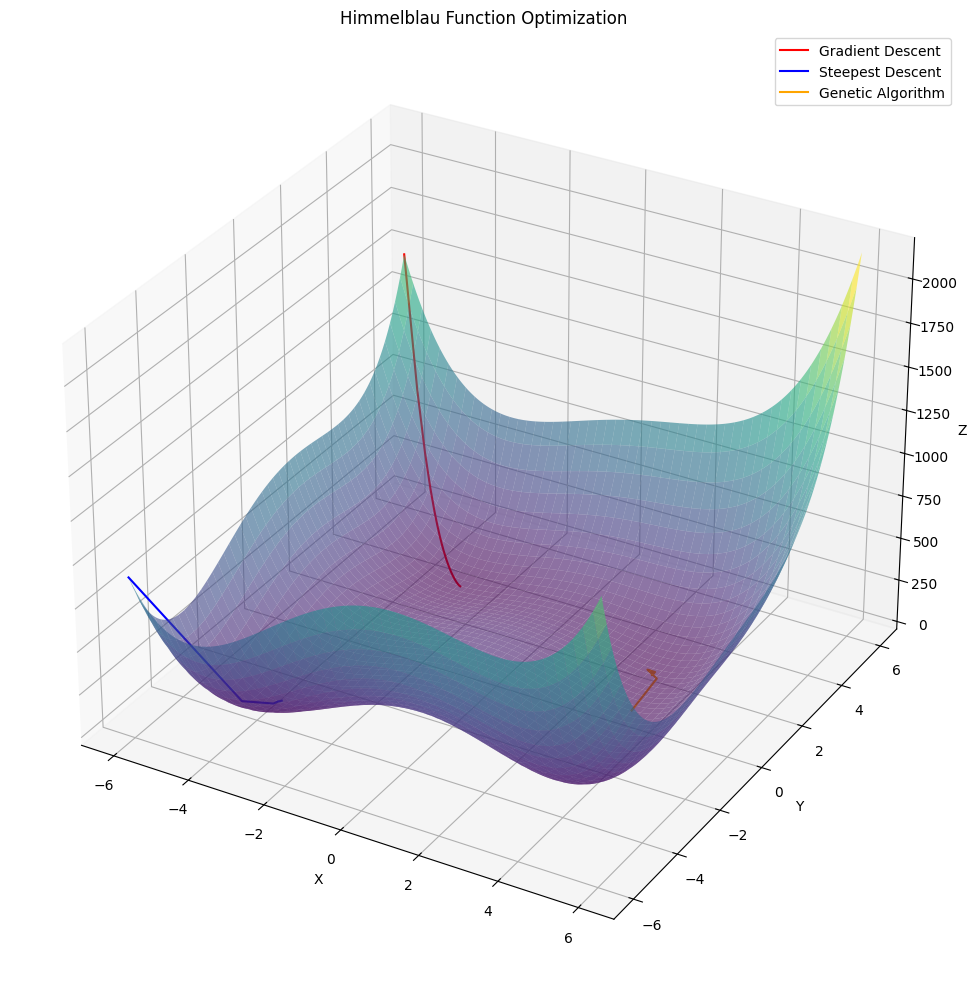

Himmelblau Optimization Results:
  Gradient Descent:
    • Found minimum: f(x*) = 0.000000
    • Error from f* = 0.000000
    • Iterations     = 272
    • Elapsed time   = 0.002659 s

  Steepest Descent:
    • Found minimum: f(x*) = 0.000000
    • Error from f* = 0.000000
    • Iterations     = 24
    • Elapsed time   = 0.000797 s

  Genetic Algorithm:
    • Found minimum: f(x*) = 0.000065
    • Error from f* = 0.000065
    • Iterations     = 200
    • Elapsed time   = 0.125383 s


In [16]:
# --- Setup for Himmelblau function optimization with timing ---
# Initial guesses
x0_himmel   = np.array([-6.0,  6.0])
x0_himmel2  = np.array([-6.0, -6.0])

# Bounds for heuristic methods
bounds_himmel = np.array([[-6, 6], [-6, 6]])

# Known global minimum value
f_star_himmel = 0.0

# ------------------ Gradient Descent ------------------
t0 = time.perf_counter()
opt_gd_h, path_gd_h = gradient_descent(
    grad_himmelblau,
    x0_himmel,
    lr=0.001,
    max_iters=10000
)
elapsed_gd_h = time.perf_counter() - t0
iters_gd_h   = len(path_gd_h)
min_gd_h     = himmelblau_vec(opt_gd_h)
error_gd_h   = abs(min_gd_h - f_star_himmel)

# ---------------- Steepest Descent --------------------
t0 = time.perf_counter()
opt_sd_h, path_sd_h = steepest_descent(
    himmelblau_vec,
    grad_himmelblau,
    x0_himmel2,
    max_iters=1000
)
elapsed_sd_h = time.perf_counter() - t0
iters_sd_h   = len(path_sd_h)
min_sd_h     = himmelblau_vec(opt_sd_h)
error_sd_h   = abs(min_sd_h - f_star_himmel)

# ---------------- Genetic Algorithm ------------------
t0 = time.perf_counter()
opt_ga_h, path_ga_h = genetic_algorithm(
    himmelblau_vec,
    bounds_himmel,
    generations=200
)
elapsed_ga_h = time.perf_counter() - t0
iters_ga_h   = len(path_ga_h)
min_ga_h     = himmelblau_vec(opt_ga_h)
error_ga_h   = abs(min_ga_h - f_star_himmel)

# --- Prepare trajectory arrays for plotting ---
path_gd_h = np.array(path_gd_h)
path_sd_h = np.array(path_sd_h)
path_ga_h = np.array(path_ga_h)

Z_gd_h = [himmelblau(x[0], x[1]) for x in path_gd_h]
Z_sd_h = [himmelblau(x[0], x[1]) for x in path_sd_h]
Z_ga_h = [himmelblau(x[0], x[1]) for x in path_ga_h]

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

ax.plot(path_gd_h[:, 0], path_gd_h[:, 1], Z_gd_h, 'r-',    label='Gradient Descent')
ax.plot(path_sd_h[:, 0], path_sd_h[:, 1], Z_sd_h, 'b-',    label='Steepest Descent')
ax.plot(path_ga_h[:, 0], path_ga_h[:, 1], Z_ga_h, 'orange', label='Genetic Algorithm')

ax.set_title("Himmelblau Function Optimization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.tight_layout()
plt.show()

# --- Print out optimization results ---
print("Himmelblau Optimization Results:")
print(f"  Gradient Descent:")
print(f"    • Found minimum: f(x*) = {min_gd_h:.6f}")
print(f"    • Error from f* = {error_gd_h:.6f}")
print(f"    • Iterations     = {iters_gd_h}")
print(f"    • Elapsed time   = {elapsed_gd_h:.6f} s")
print()
print(f"  Steepest Descent:")
print(f"    • Found minimum: f(x*) = {min_sd_h:.6f}")
print(f"    • Error from f* = {error_sd_h:.6f}")
print(f"    • Iterations     = {iters_sd_h}")
print(f"    • Elapsed time   = {elapsed_sd_h:.6f} s")
print()
print(f"  Genetic Algorithm:")
print(f"    • Found minimum: f(x*) = {min_ga_h:.6f}")
print(f"    • Error from f* = {error_ga_h:.6f}")
print(f"    • Iterations     = {iters_ga_h}")
print(f"    • Elapsed time   = {elapsed_ga_h:.6f} s")


Optimizing A neural net using different methods

In [17]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))


def unpack_weights(w):
    W1 = w[:8].reshape(2, 4)
    b1 = w[8:12].reshape(1, 4)
    W2 = w[12:16].reshape(4, 1)
    b2 = w[16].reshape(1, 1)
    return W1, b1, W2, b2

def forward(X, w):
    W1, b1, W2, b2 = unpack_weights(w)
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    return a1, a2

def loss_fn(w):
    _, y_pred = forward(X, w)
    return binary_cross_entropy(y, y_pred)

In [18]:
def compute_grad(w):
    W1, b1, W2, b2 = unpack_weights(w)
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # Backprop
    dz2 = a2 - y
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2 @ W2.T * sigmoid_deriv(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    grads = np.concatenate([
        dW1.ravel(), db1.ravel(),
        dW2.ravel(), db2.ravel()
    ])
    return grads

In [19]:
def visualize_neural_net(input_size=2, hidden_size=4, output_size=1):
    G = nx.DiGraph()
    # nodes
    layers = {
        "input": [f"I{i+1}" for i in range(input_size)],
        "hidden": [f"H{i+1}" for i in range(hidden_size)],
        "output": [f"O{i+1}" for i in range(output_size)]
    }

    positions = {}
    for i, node in enumerate(layers["input"]):
        G.add_node(node)
        positions[node] = (0, -i)

    for i, node in enumerate(layers["hidden"]):
        G.add_node(node)
        positions[node] = (1, -i + 0.5)

    for i, node in enumerate(layers["output"]):
        G.add_node(node)
        positions[node] = (2, -i)

    # Connect layers
    for src in layers["input"]:
        for dst in layers["hidden"]:
            G.add_edge(src, dst)

    for src in layers["hidden"]:
        for dst in layers["output"]:
            G.add_edge(src, dst)

    plt.figure(figsize=(8, 5))
    nx.draw(G, pos=positions, with_labels=True, node_size=1500, node_color='lightblue', edge_color='gray', arrows=True)
    plt.title("Neural Network Architecture (2-4-1)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


C:\Users\mikol\AppData\Local\Temp\ipykernel_17560\3775989789.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


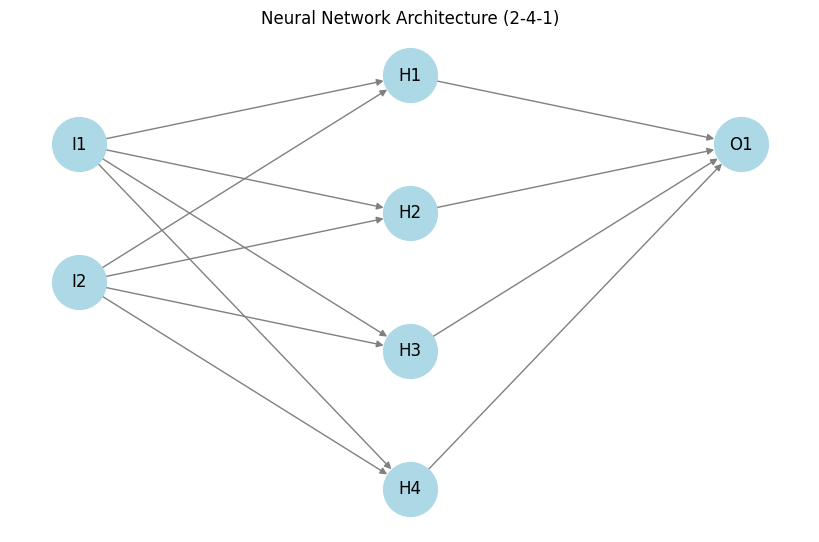

In [20]:
visualize_neural_net()

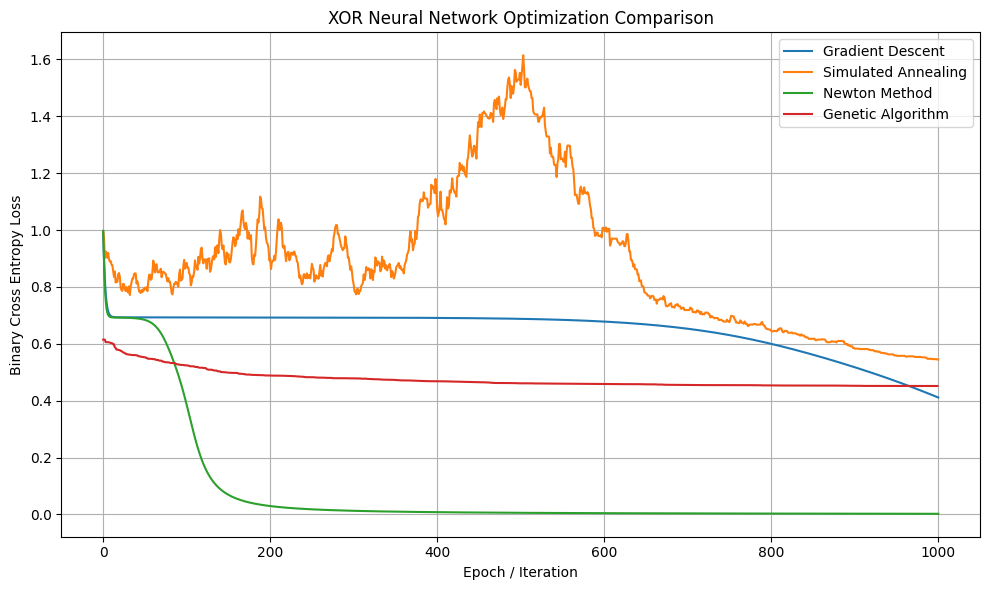

XOR Neural Network Optimization Results:

Gradient Descent:
  • Final loss:        0.411297
  • Iterations:        1001
  • Elapsed time:      0.035002 s

Simulated Annealing:
  • Final loss:        0.544696
  • Iterations:        1001
  • Elapsed time:      0.029440 s

Newton Method:
  • Final loss:        0.002367
  • Iterations:        1001
  • Elapsed time:      0.038975 s

Genetic Algorithm:
  • Final loss:        0.451788
  • Iterations:        1000
  • Elapsed time:      2.095628 s


In [21]:
# --- Run all methods ---
def hess_identity(w):
    return np.eye(len(w))  # simplified Hessian approximation

np.random.seed(42)
w0 = np.random.randn(17) * 0.5
bounds = np.array([[-3, 3]] * 17)
# ---------------- Gradient Descent ----------------
t0 = time.perf_counter()
w_gd, path_gd = gradient_descent(
    compute_grad,
    w0.copy(),
    lr=0.1,
    max_iters=1000
)
elapsed_gd = time.perf_counter() - t0
iters_gd   = len(path_gd)
final_loss_gd = loss_fn(w_gd)

# ---------------- Simulated Annealing ----------------
t0 = time.perf_counter()
w_sa, path_sa = simulated_annealing(
    loss_fn,
    w0.copy(),
    bounds,
    max_iters=1000,
    temp=10.0,
    cooling=0.99
)
elapsed_sa = time.perf_counter() - t0
iters_sa   = len(path_sa)
final_loss_sa = loss_fn(w_sa)

# ---------------- Newton Method ----------------
t0 = time.perf_counter()
w_newton, path_newton = newton_method(
    compute_grad,
    hess_identity,
    w0.copy(),
    max_iters=1000
)
elapsed_newton = time.perf_counter() - t0
iters_newton   = len(path_newton)
final_loss_newton = loss_fn(w_newton)

# ---------------- Genetic Algorithm ----------------
t0 = time.perf_counter()
w_ga, path_ga = genetic_algorithm(
    loss_fn,
    bounds,
    generations=1000
)
elapsed_ga = time.perf_counter() - t0
iters_ga   = len(path_ga)
final_loss_ga = loss_fn(w_ga)

# ---------------- Plot loss curves ----------------
loss_gd     = [loss_fn(w) for w in path_gd]
loss_sa     = [loss_fn(w) for w in path_sa]
loss_newton = [loss_fn(w) for w in path_newton]
loss_ga     = [loss_fn(w) for w in path_ga]

plt.figure(figsize=(10, 6))
plt.plot(loss_gd,     label="Gradient Descent")
plt.plot(loss_sa,     label="Simulated Annealing")
plt.plot(loss_newton, label="Newton Method")
plt.plot(loss_ga,     label="Genetic Algorithm")
plt.xlabel("Epoch / Iteration")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("XOR Neural Network Optimization Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Print timing & results ----------------
print("XOR Neural Network Optimization Results:")
print()
print("Gradient Descent:")
print(f"  • Final loss:        {final_loss_gd:.6f}")
print(f"  • Iterations:        {iters_gd}")
print(f"  • Elapsed time:      {elapsed_gd:.6f} s")
print()
print("Simulated Annealing:")
print(f"  • Final loss:        {final_loss_sa:.6f}")
print(f"  • Iterations:        {iters_sa}")
print(f"  • Elapsed time:      {elapsed_sa:.6f} s")
print()
print("Newton Method:")
print(f"  • Final loss:        {final_loss_newton:.6f}")
print(f"  • Iterations:        {iters_newton}")
print(f"  • Elapsed time:      {elapsed_newton:.6f} s")
print()
print("Genetic Algorithm:")
print(f"  • Final loss:        {final_loss_ga:.6f}")
print(f"  • Iterations:        {iters_ga}")
print(f"  • Elapsed time:      {elapsed_ga:.6f} s")


Visualization of Paths

In [22]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_pca_3d_paths(paths_dict, title="3D PCA Projection of Optimization Paths"):
    all_points = np.vstack([np.array(path) for path in paths_dict.values()])
    pca = PCA(n_components=3)
    pca.fit(all_points)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for label, path in paths_dict.items():
        path = np.array(path)
        path_3d = pca.transform(path)
        ax.plot(path_3d[:, 0], path_3d[:, 1], path_3d[:, 2], label=label)

    ax.set_title(title)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    ax.legend()
    plt.tight_layout()
    plt.show()


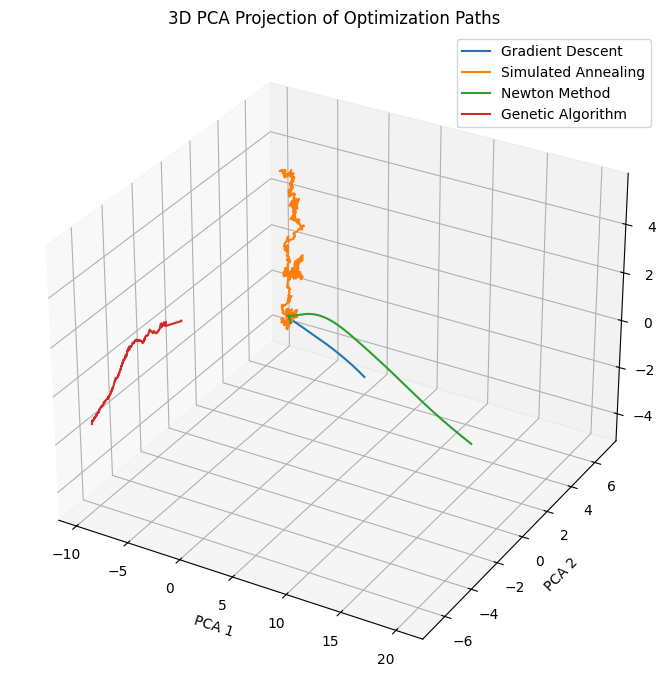

In [23]:
plot_pca_3d_paths({
    "Gradient Descent": path_gd,
    "Simulated Annealing": path_sa,
    "Newton Method": path_newton,
    "Genetic Algorithm": path_ga
})
